In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D


In [65]:
df=pd.read_excel('D:/CASApre/CASA11ABM/Coursework 1/vis/pop-endowment.xlsx')
df1=pd.read_csv('D:/CASApre/CASA11ABM/Coursework 1/vis/1.csv')

In [100]:
exp12 = pd.read_csv('D:/CASApre/CASA11ABM/Coursework 1/vis/Sugarscape 2-change exp1-2-stats.csv')
exp13 = pd.read_csv('D:/CASApre/CASA11ABM/Coursework 1/vis/Sugarscape 3-change exp1-3-stats.csv')
exp22 = pd.read_csv('D:/CASApre/CASA11ABM/Coursework 1/vis/Sugarscape 2-change exp2-2-stats.csv')
exp23 = pd.read_csv('D:/CASApre/CASA11ABM/Coursework 1/vis/Sugarscape 3-change exp2-3-stats.csv')
exp32 = pd.read_csv('D:/CASApre/CASA11ABM/Coursework 1/vis/Sugarscape 2-change exp3-2-stats.csv')

1 exp1

1. initial-population model 2

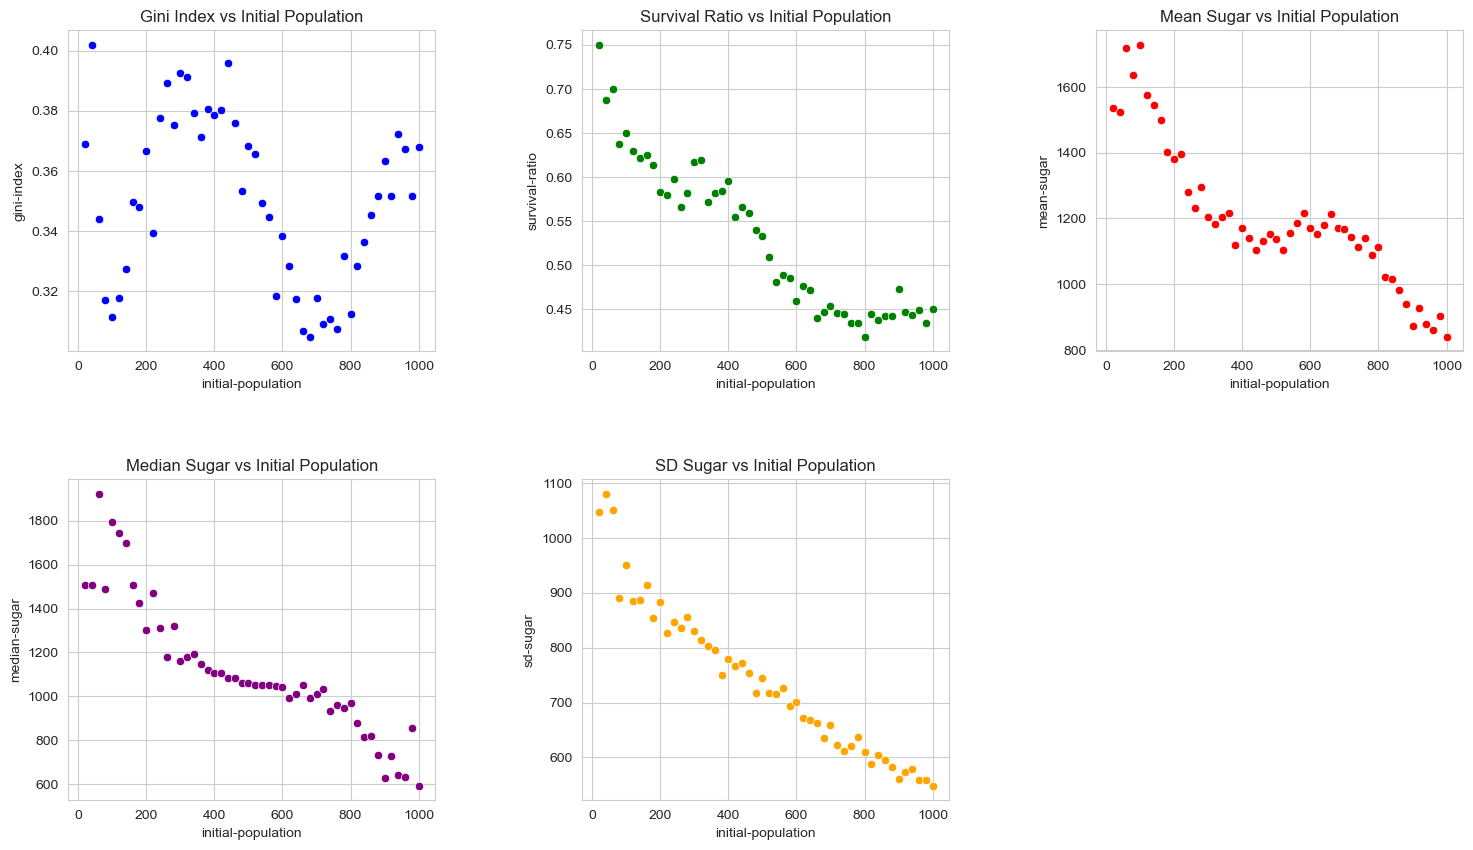

In [50]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure to plot multiple subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Plot each dependent variable against the independent variable
sns.scatterplot(ax=axs[0, 0], data=exp12, x='initial-population', y='gini-index', color='blue')
axs[0, 0].set_title('Gini Index vs Initial Population')

sns.scatterplot(ax=axs[0, 1], data=exp12, x='initial-population', y='survival-ratio', color='green')
axs[0, 1].set_title('Survival Ratio vs Initial Population')

sns.scatterplot(ax=axs[0, 2], data=exp12, x='initial-population', y='mean-sugar', color='red')
axs[0, 2].set_title('Mean Sugar vs Initial Population')

sns.scatterplot(ax=axs[1, 0], data=exp12, x='initial-population', y='median-sugar', color='purple')
axs[1, 0].set_title('Median Sugar vs Initial Population')

sns.scatterplot(ax=axs[1, 1], data=exp12, x='initial-population', y='sd-sugar', color='orange')
axs[1, 1].set_title('SD Sugar vs Initial Population')

# Hide the empty subplot (bottom right)
axs[1, 2].set_visible(False)

plt.show()


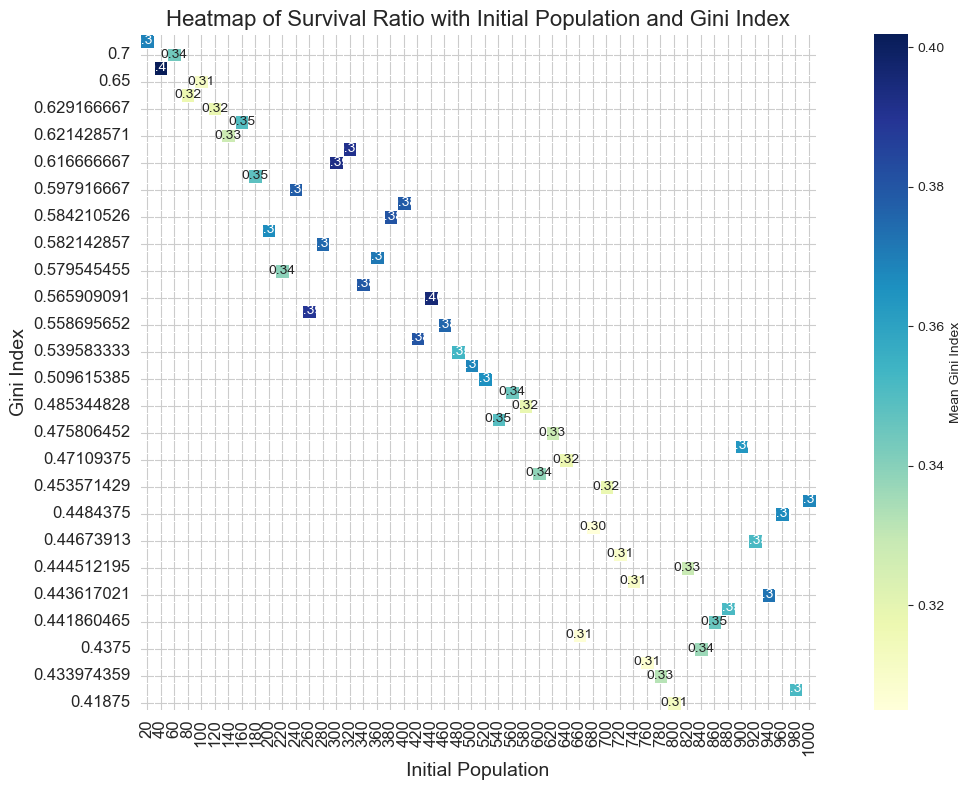

In [79]:
# Calculate the mean survival ratio for each combination of initial-population and gini-index
data_grouped = exp12.groupby(['initial-population','survival-ratio']).agg({'gini-index':'mean'}).reset_index()

# Create a pivot table for the heatmap
pivot_table = data_grouped.pivot("survival-ratio", "initial-population", "gini-index")

# Create the heatmap with styling
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Mean Gini Index'}, 
            linewidths=0.5, linecolor='white', square=True)  
plt.title('Heatmap of Survival Ratio with Initial Population and Gini Index', fontsize=16)  # 标题字体大小
plt.xlabel('Initial Population', fontsize=14)  
plt.ylabel('Gini Index', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.gca().invert_yaxis()  
plt.tight_layout() 
plt.show()


2. initial-population model 3

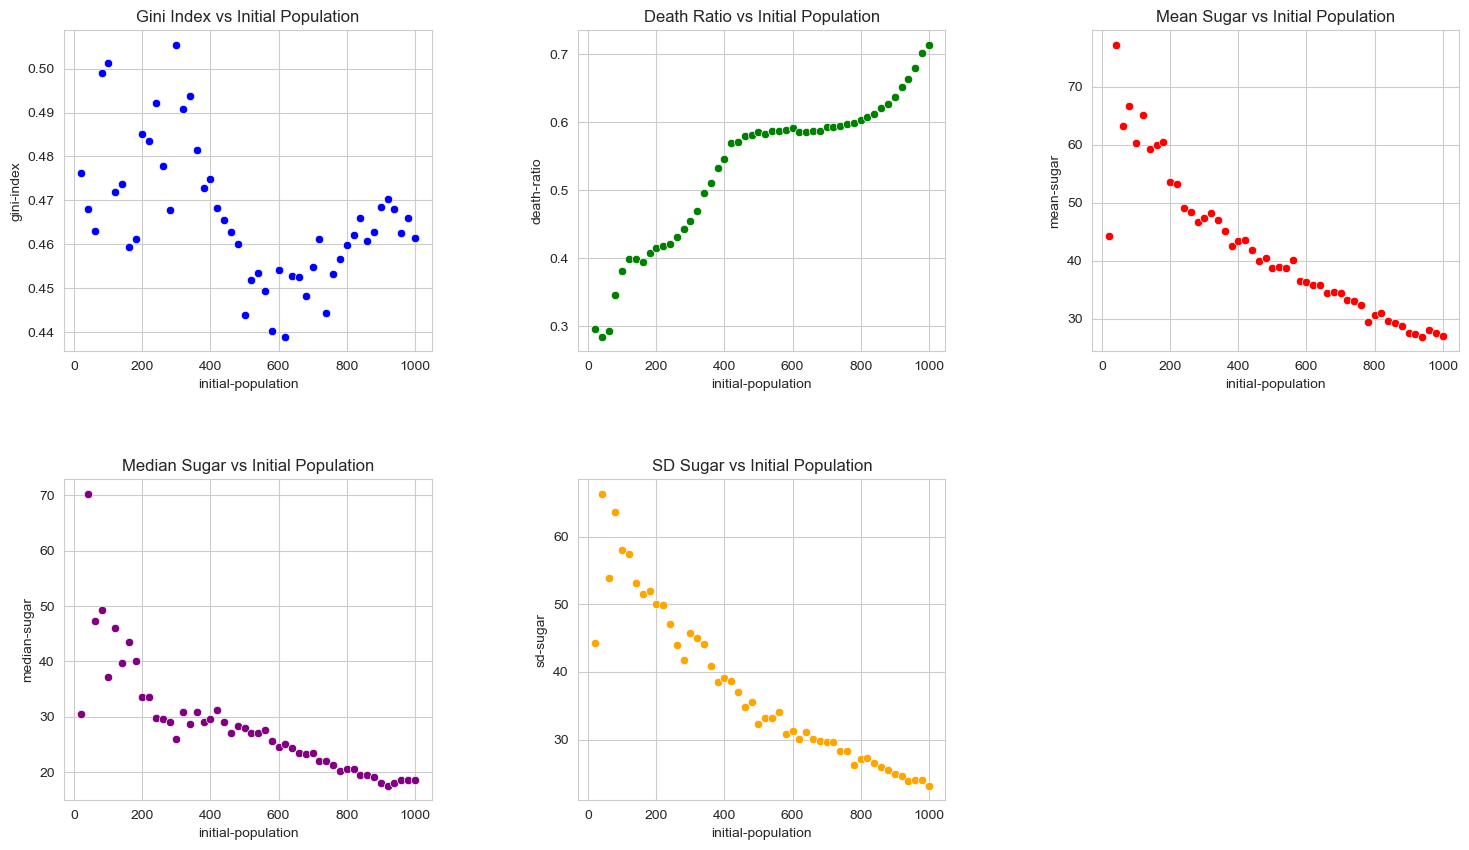

In [76]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure to plot multiple subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Plot each dependent variable against the independent variable
sns.scatterplot(ax=axs[0, 0], data=exp13, x='initial-population', y='gini-index', color='blue')
axs[0, 0].set_title('Gini Index vs Initial Population')

sns.scatterplot(ax=axs[0, 1], data=exp13, x='initial-population', y='death-ratio', color='green')
axs[0, 1].set_title('Death Ratio vs Initial Population')

sns.scatterplot(ax=axs[0, 2], data=exp13, x='initial-population', y='mean-sugar', color='red')
axs[0, 2].set_title('Mean Sugar vs Initial Population')

sns.scatterplot(ax=axs[1, 0], data=exp13, x='initial-population', y='median-sugar', color='purple')
axs[1, 0].set_title('Median Sugar vs Initial Population')

sns.scatterplot(ax=axs[1, 1], data=exp13, x='initial-population', y='sd-sugar', color='orange')
axs[1, 1].set_title('SD Sugar vs Initial Population')

# Hide the empty subplot (bottom right)
axs[1, 2].set_visible(False)

plt.show()

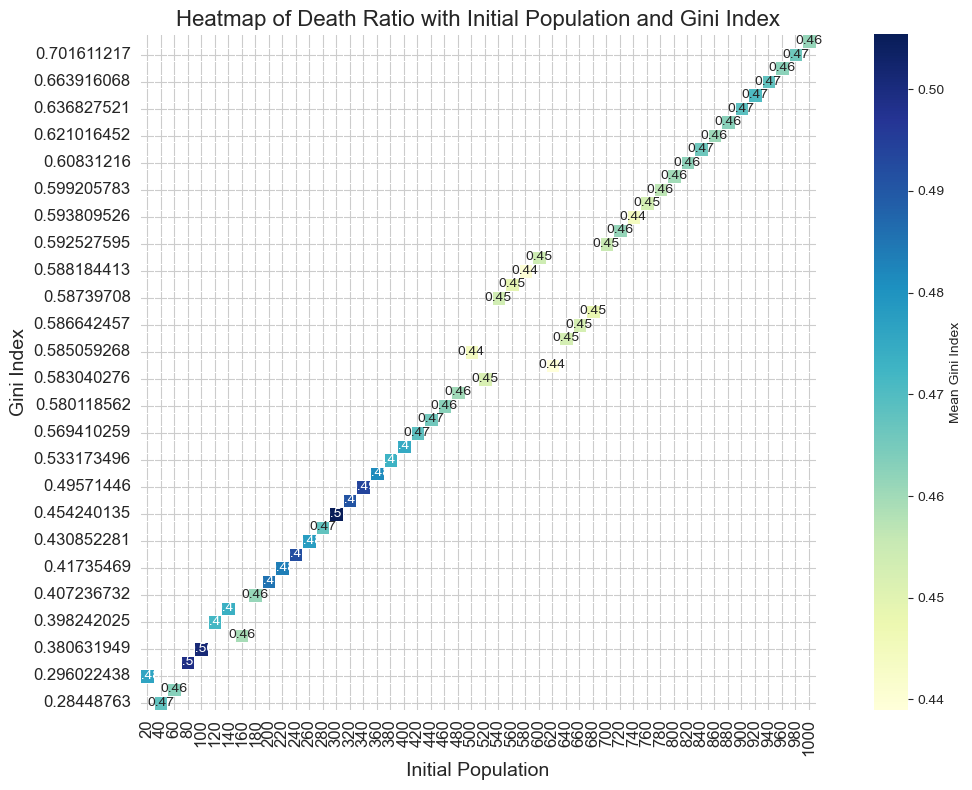

In [81]:
# Calculate the mean survival ratio for each combination of initial-population and gini-index
data_grouped13 = exp13.groupby(['initial-population','death-ratio']).agg({'gini-index':'mean'}).reset_index()

# Create a pivot table for the heatmap
pivot_table13 = data_grouped13.pivot( "death-ratio","initial-population", "gini-index")

# Create the heatmap with styling
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table13, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Mean Gini Index'}, 
            linewidths=0.5, linecolor='white', square=True)  
plt.title('Heatmap of Death Ratio with Initial Population and Gini Index', fontsize=16)  # 标题字体大小
plt.xlabel('Initial Population', fontsize=14)  
plt.ylabel('Gini Index', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.gca().invert_yaxis()  
plt.tight_layout() 
plt.show()

2 exp2

2.1 endowment model 2

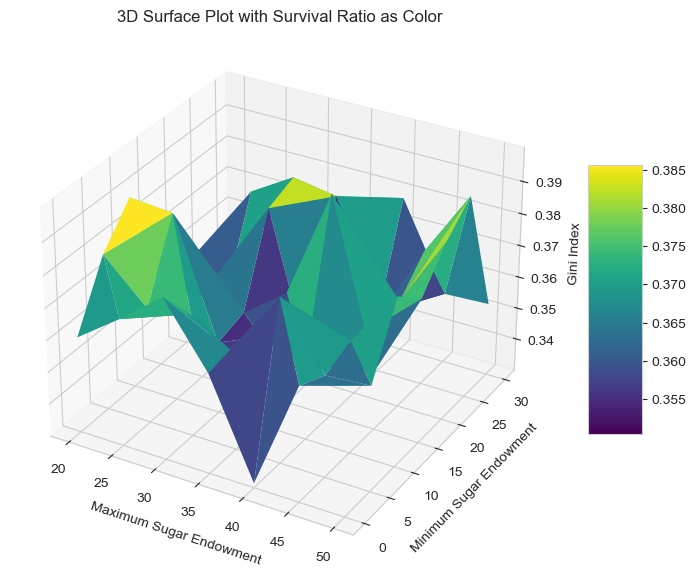

In [84]:
# Prepare data
x = exp22['maximum-sugar-endowment']
y = exp22['minimum-sugar-endowment']
z = exp22['gini-index']
c = exp22['survival-ratio']

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to color the surface. The `cmap` parameter allows choosing the color map.
# The `stride` parameter specifies the step size for how densely the surface plot samples the data points.
surf = ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none', linewidth=0.2, antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.

# Customize labels
ax.set_xlabel('Maximum Sugar Endowment')
ax.set_ylabel('Minimum Sugar Endowment')
ax.set_zlabel('Gini Index')
ax.set_title('3D Surface Plot with Survival Ratio as Color')

# Show plot
plt.show()


In [106]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

# Assuming X, Y, Z, and AI are your existing data
X = exp22['maximum-sugar-endowment']
Y = exp22['minimum-sugar-endowment']
Z = exp22['gini-index']
AI = exp22['survival-ratio']

# Grid the X and Y data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the Z data
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# Interpolate the AI data to get ai_mapped, the AI values mapped onto the grid defined by xi and yi
ai_mapped = griddata((X, Y), AI, (xi, yi), method='cubic')

colorscale = 'spectral'

# Use the interpolated ai_mapped as color mapping
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=ai_mapped, colorscale=colorscale)],
                layout=go.Layout(
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))

fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='Maximum Sugar Endowment'),
                    yaxis_title='Minimum Sugar Endowment',
                    zaxis_title='Gini Index',
                    aspectratio=dict(x=1, y=1, z=0.7),
                    aspectmode='manual',
                    bgcolor='rgb(255, 255, 255)',
                    ))

fig.show()


2.2 endowment model 3

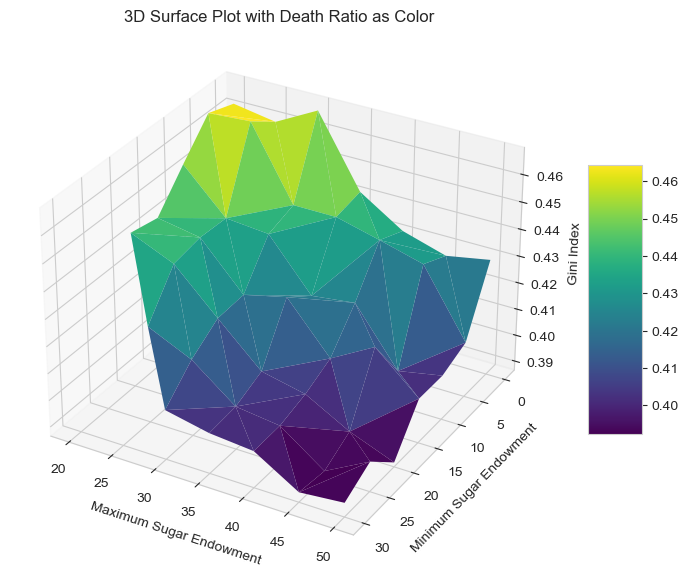

In [96]:
# Prepare data
x = exp23['maximum-sugar-endowment']
y = exp23['minimum-sugar-endowment']
z = exp23['gini-index']
c = exp23['death-ratio']

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to color the surface. The `cmap` parameter allows choosing the color map.
# The `stride` parameter specifies the step size for how densely the surface plot samples the data points.
surf = ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none', linewidth=0.2, antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.

# Customize labels
ax.set_xlabel('Maximum Sugar Endowment')

ax.set_ylabel('Minimum Sugar Endowment')
ax.invert_yaxis()
ax.set_zlabel('Gini Index')
ax.set_title('3D Surface Plot with Death Ratio as Color')

# Show plot
plt.show()

In [107]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

# Assuming X, Y, Z, and AI are your existing data
X = exp23['maximum-sugar-endowment']
Y = exp23['minimum-sugar-endowment']
Z = exp23['gini-index']
AI = exp23['death-ratio']

# Grid the X and Y data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the Z data
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# Interpolate the AI data to get ai_mapped, the AI values mapped onto the grid defined by xi and yi
ai_mapped = griddata((X, Y), AI, (xi, yi), method='cubic')

colorscale = 'spectral'

# Use the interpolated ai_mapped as color mapping
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=ai_mapped, colorscale=colorscale)],
                layout=go.Layout(
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))

fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='Maximum Sugar Endowment'),
                    yaxis_title='Minimum Sugar Endowment',
                    zaxis_title='Gini Index',
                    aspectratio=dict(x=1, y=1, z=0.7),
                    aspectmode='manual',
                    bgcolor='rgb(255, 255, 255)',
                    ))

fig.show()

3 exp3

3.1 initial-population + endowment  model 2

In [108]:
# Assuming X, Y, Z, and AI are your existing data
X = exp32['maximum-sugar-endowment']
Y = exp32['minimum-sugar-endowment']
Z = exp32['initial-population']
AI = exp32['survival-ratio']

# Grid the X and Y data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the Z data
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# Interpolate the AI data to get ai_mapped, the AI values mapped onto the grid defined by xi and yi
ai_mapped = griddata((X, Y), AI, (xi, yi), method='cubic')

colorscale = 'spectral'

# Use the interpolated ai_mapped as color mapping
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=ai_mapped, colorscale=colorscale)],
                layout=go.Layout(
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))

fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='Maximum Sugar Endowment'),
                    yaxis_title='Minimum Sugar Endowment',
                    zaxis_title='Initial Population',
                    aspectratio=dict(x=1, y=1, z=0.7),
                    aspectmode='manual',
                    bgcolor='rgb(255, 255, 255)',
                    ))

fig.show()

In [111]:
# Assuming X, Y, Z, and AI are your existing data
X = exp32['maximum-sugar-endowment']
Y = exp32['minimum-sugar-endowment']
Z = exp32['initial-population']
AI = exp32['gini-index']

# Grid the X and Y data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the Z data
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# Interpolate the AI data to get ai_mapped, the AI values mapped onto the grid defined by xi and yi
ai_mapped = griddata((X, Y), AI, (xi, yi), method='cubic')

colorscale = 'spectral'

# Use the interpolated ai_mapped as color mapping
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=ai_mapped, colorscale=colorscale)],
                layout=go.Layout(
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))

fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='Maximum Sugar Endowment'),
                    yaxis_title='Minimum Sugar Endowment',
                    zaxis_title='Initial Population',
                    aspectratio=dict(x=1, y=1, z=0.7),
                    aspectmode='manual',
                    bgcolor='rgb(255, 255, 255)',
                    ))

fig.show()